<h3 style='text-align: right;'> Geophysics Independent Project </h3>

## Notebook 2: Find and download data

In this notebook, you'll learn to find and download seismic data.

As before, note that you can understand these analyses at a range of levels.  In a first pass, you may wish to just run the cells and briefly note what's going on.  But later you'll want to write similar code, so you'll want to develop a deeper understanding that you can use.

In [1]:
# import the packages we'll need
import numpy as np
import obspy

## 1. See which data are publicly available: via gmap

Our first step will be to inspect the data available in a given region.  There are a number of ways to look for seismic data.

One is to use a map-based approach on the website https://ds.iris.edu/gmap/.  You can zoom in to particular regions and click to inspect.  

To start, see if you can find data in the Czech Republic.
- First pick a data centre under "Advanced Filters" on the left.  Try ORFEUS (https://www.orfeus-eu.org/), which maintains a lot of European data (and data collected by Europeans).  The other largest data centres are IRIS and GEOFON---you can try those too.
- Click the Location Box circle under the "Geographic Boundary" tap on the left.  Then draw a square around the Czech Republic.
- Press "Update Map" to see the stations in that box.

You should see a number of stations in the Z3 network, which is the AlpArray network. Click on what of these stations and then press "more information" to see more information about the station.

Q1: Where is the station you've identified located?

_Your answer here._

Q2: What is the station name?  Usually this consists of 3-5 capital letters and numbers.

_Your answer here._


Now look down on the "instruments / channels" section.  This section tells you which instruments are located there and what's being recorded.  Note that we're interested in ground shaking, but sometimes there are other instruments in the same station, which record temperature, pressure, strain, or something else.

The channel codes are 3-letter sequences---like "HHZ"---that tell you a bit about what's recorded.  

The first letter provides some information about the instrument quality and the sampling rate.  That information is also given in Hz (samples per second) next to the channel.
-E or H: usually high rate, at least 100 Hz: 100 samples per second.  
-B: broadband, usually 40-100 Hz
-L: lower rates, often 20 Hz

The second letter is usually "H" for seismic data that can record small signals.

The third letter is the direction of motion being recorded.
-Z: up 
-E: east 
-N: north
-1 or 2: some horizontal direction.  Often 1 is east and 2 is north, but not always.  

Try clicking on one of the horizontal components at your station.  

Q3. What is the azimuth?  This is the direction of motion.

_Your answer here._

Q4. How many data points are recorded per second?

_Your answer here._

Q5. What are the units of the recorded data?

_Your answer here._

If the units are "m/s," the station is recording ground velocity.  This will be the most common for your analysis.  However, you could come across old data that records ground displacement, with units of "m."


## 2. See which data are publicly available: via an FDSN client

The gmap website works well for rough analysis, but in some cases it can be a bit bulky, particularly if you're interested in numerous stations.  So you may also wish to see which data are available using a command line approach.  You can connect to data centres via an FDSN connection.  (You'll also use this connection to download data.)

A good quick summary of FDSN connections on obspy is here: https://docs.obspy.org/packages/obspy.clients.fdsn.html.

To look for available stations, we first open a connection to the data centre.  We'll choose one of the biggest: IRIS (https://www.iris.edu/hq/).  IRIS, now part of SAGE, is a North America-centric consortium of institutions that collaborate to facilitate access to geophysical data.  IRIS doesn't run any seismic stations itself, but the IRIS data centre _stores_ seismic data collected by a variety of networks.  Some of those networks are part of SAGE, others are few-year projects run by a few scientists, and others are long-term networks maintained by other government-funded agency.   


In [2]:
# this line creates a shortcut to the function obspy.clients.fdsn.client.Client
from obspy.clients.fdsn.client import Client

# and this line calls the function Client to establish a connection to IRIS.
# note you might also try "ORFEUS" or "GEOFON" if you were looking for data collected by Europeans, 
# though IRIS has lots of European data too
client = Client("IRIS")

Say we want to look for data recorded in 2023 within a few hundred km of Oxford, located at 51.75 degrees N, 1.25 degrees W.  We can use our connect to search for stations in this distance.

In [3]:
# first let's specify the time range: year, month, day, hour, minute, second
time1=obspy.UTCDateTime(2023,1,1,0,0,0)
time2=obspy.UTCDateTime(2024,1,1,0,0,0)

print('Times from ',time1,' to ',time2)

Times from  2023-01-01T00:00:00.000000Z  to  2024-01-01T00:00:00.000000Z


In [4]:
# let's grab an inventory of stations
# note that here we specify channels of the form '?H?', so we get seismic data
inv=client.get_stations(latitude=51.75,longitude=-1.25,maxradius=300/111,
                        starttime=time1,endtime=time2,network='*',channel='?H?',
                        level='channel',includeavailability=True)

# and print it
print(inv)

Inventory created at 2025-04-09T15:02:29.813700Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (4):
			BN, GB, UK, WF
		Stations (29):
			BN.LLW (Llanuwchllyn, UK)
			GB.BEDF (Bedfield, Suffolk, England, UK)
			GB.CWF (Charnwood Forest, Leicestershire, England, UK)
			GB.DYA (Yadsworthy, Devon, England, UK) (2x)
			GB.ELMS (Elmsett, Suffolk)
			GB.ELSH (Elham Standardhill Farm, Kent, England, UK)
			GB.FOEL (Foel Wylfa Tregeiriog, Wales, UK)
			GB.GDLE (Glaisdale, Yorkshire)
			GB.HLM1 (Long Mynd, Wales, UK)
			GB.HMNX (Herstmonceux, Sussex, UK)
			GB.HPK (Haverah Park, North Yorkshire, England, UK) (2x)
			GB.HTL (Hartland, Devon, England, UK)
			GB.JSA (St Aubins, Jersey, Channel Islands, UK)
			GB.LBWR (Ladybower Resevoir, Derbyshire, England)
			GB.LMK (Market Rasen, Lincolnshire, UK)
			GB.MCH1 (Michaelchurch, Herefordshire, E

In [5]:
# we could look at the stations in just one network
print(inv[1])

Network GB (Great Britain Seismograph Network ())
	Station Count: 22/161 (Selected/Total)
	1970-01-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (22):
			GB.BEDF (Bedfield, Suffolk, England, UK)
			GB.CWF (Charnwood Forest, Leicestershire, England, UK)
			GB.DYA (Yadsworthy, Devon, England, UK) (2x)
			GB.ELMS (Elmsett, Suffolk)
			GB.ELSH (Elham Standardhill Farm, Kent, England, UK)
			GB.FOEL (Foel Wylfa Tregeiriog, Wales, UK)
			GB.GDLE (Glaisdale, Yorkshire)
			GB.HLM1 (Long Mynd, Wales, UK)
			GB.HMNX (Herstmonceux, Sussex, UK)
			GB.HPK (Haverah Park, North Yorkshire, England, UK) (2x)
			GB.HTL (Hartland, Devon, England, UK)
			GB.JSA (St Aubins, Jersey, Channel Islands, UK)
			GB.LBWR (Ladybower Resevoir, Derbyshire, England)
			GB.LMK (Market Rasen, Lincolnshire, UK)
			GB.MCH1 (Michaelchurch, Herefordshire, England, UK)
			GB.RSBS (, Rosebush Pembrokeshire, UK)
			GB.STNC (Stoke Newchapel, Staffordshire, England, UK)
			GB.SWN1 (Wroughton, Wiltshire, England, U

In [7]:
# and maybe the first station in that network
print(inv[1][0])

# and the first channel at the station
print('\n')
print(inv[1][0][0])

Station BEDF (Bedfield, Suffolk, England, UK)
	Station Code: BEDF
	Channel Count: 3/3 (Selected/Total)
	2022-06-20T00:00:00.000000Z - 2025-02-06T00:00:00.000000Z
	Access: open 
	Latitude: 52.25, Longitude: 1.26, Elevation: 54.0 m
	Available Channels:
		BEDF..HHZ, BEDF..HHN, BEDF..HHE


Channel 'HHE', Location '' 
	Time range: 2022-06-20T00:00:00.000000Z - 2025-02-06T00:00:00.000000Z
	Latitude: 52.25, Longitude: 1.26, Elevation: 54.0 m, Local Depth: 0.0 m
	Azimuth: 90.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: GEOPHYSICAL
	Sampling Rate: 100.00 Hz
	Sensor (Description): None ()
	Response information available


Q6. Pick a station to consider and answer the questions below.

- Which seismic network is it in?


- What is the station code?


- Which channels are recorded?


- What are their sampling rates?


- When is the data available?  This information is given under "data availability from ..." 

We can also identify available stations and data by specifying the network and station we want.  Say we want data from the BGS-run network GB and station FOEL.

In [8]:
inv=client.get_stations(starttime=time1,endtime=time2,network='GB',channel='?H?',
                        level='channel',includeavailability=True,station='FOEL')
print(inv)

print(inv[0][0])

Inventory created at 2025-04-09T15:04:11.746100Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2023-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			GB
		Stations (1):
			GB.FOEL (Foel Wylfa Tregeiriog, Wales, UK)
		Channels (6):
			GB.FOEL..BHZ, GB.FOEL..BHN, GB.FOEL..BHE, GB.FOEL..HHZ, 
			GB.FOEL..HHN, GB.FOEL..HHE
Station FOEL (Foel Wylfa Tregeiriog, Wales, UK)
	Station Code: FOEL
	Channel Count: 6/6 (Selected/Total)
	2014-09-26T00:00:00.000000Z - 2024-08-20T00:00:00.000000Z
	Access: open 
	Latitude: 52.89, Longitude: -3.20, Elevation: 447.0 m
	Available Channels:
		FOEL..BHZ, FOEL..BHN, FOEL..BHE, FOEL..HHZ, FOEL..HHN, FOEL..HHE


## 3. Download some data.  

Now that we've found a station of interest, we can download data.

Let's consider a time with a large earthquake and download data from one of the GB stations, FOEL.  We'll download the 100 Hz data, which is recorded on channels HH?.

To start, make sure we have a connection to the data centre open

In [9]:
# this line creates a shortcut to the function obspy.clients.fdsn.client.Client
from obspy.clients.fdsn.client import Client

# and this line calls the function Client to establish a connection to IRIS.
# note you might also try "ORFEUS" or "GEOFON" if you were looking for data collected by Europeans, 
# though IRIS has lots of European data too
client = Client("IRIS")

Next, determine which time window we want.

In [10]:
# start on the 27th of February 2010, at 6:30 am UTC
t1 = obspy.UTCDateTime(2023,9,8,22,11,1)

# and finish 10 minutes, or 600 seconds later
t2 = t1 + 600*4

And ask for some waveforms.

In [11]:
# we'll look for data from network GB, station FOEL, and channel HH?---any channel that starts with 
# the third argument here, which is given as "*", is the "location".  This is another
# way to distinguish channels, but it will rarely be important.  Specifying "*" means it can be anything.
st = client.get_waveforms("GB", "FOEL", "*", "HH?", t1, t2,attach_response=True)

# and we've got three streams!  One per channel
print(st)  

3 Trace(s) in Stream:
GB.FOEL..HHE | 2023-09-08T22:11:01.000000Z - 2023-09-08T22:51:01.000000Z | 100.0 Hz, 240001 samples
GB.FOEL..HHN | 2023-09-08T22:11:01.000000Z - 2023-09-08T22:51:01.000000Z | 100.0 Hz, 240001 samples
GB.FOEL..HHZ | 2023-09-08T22:11:01.000000Z - 2023-09-08T22:51:01.000000Z | 100.0 Hz, 240001 samples


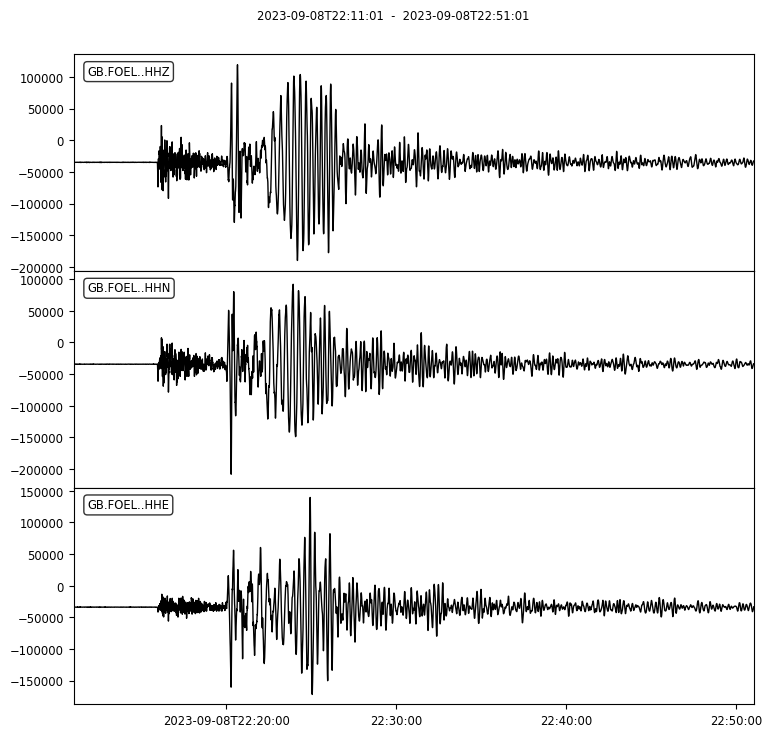

In [12]:
# and plot the data
st.plot();

Q7.  Can you identify the P, S, Love, and Rayleigh waves?  When do each of these waves arrive.

_Your answer here._

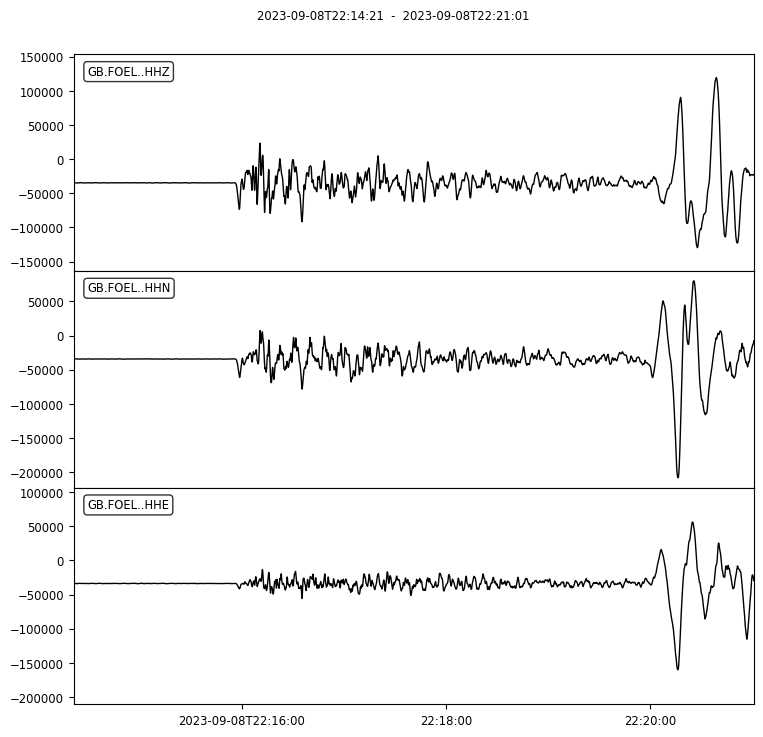

In [13]:
# Note that you might want to plot just a portion of the record---say 200 s after the earthquake to 600 s after the earthquake
st.plot(starttime=t1+200,endtime=t1+600);

Q8. Find a recording of this earthquake at another station---perhaps closer or farther away.  Plot its record.

In [16]:
# Your code and plots here.